In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import sklearn

In [11]:
train_data_csv = "/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/train.csv"

test_data_csv = "/home/azafar/Projects/Allstate Purchase Prediction Challenge/Data/test_v2.csv"

In [12]:
def read_csv(file):
    return pd.read_csv(file)

In [14]:
train_data = read_csv(train_data_csv)

test_data = read_csv(test_data_csv)

In [16]:
print train_data.head()

   customer_ID  shopping_pt  record_type  day   time state  location  \
0     10000000            1            0    0  08:35    IN     10001   
1     10000000            2            0    0  08:38    IN     10001   
2     10000000            3            0    0  08:38    IN     10001   
3     10000000            4            0    0  08:39    IN     10001   
4     10000000            5            0    0  11:55    IN     10001   

   group_size  homeowner  car_age  ...  C_previous  duration_previous  A  B  \
0           2          0        2  ...         1.0                2.0  1  0   
1           2          0        2  ...         1.0                2.0  1  0   
2           2          0        2  ...         1.0                2.0  1  0   
3           2          0        2  ...         1.0                2.0  1  0   
4           2          0        2  ...         1.0                2.0  1  0   

   C  D  E  F  G  cost  
0  2  2  1  2  2   633  
1  2  2  1  2  1   630  
2  2  2  1  2  1 

In [21]:
#checking dimensions

print len(train_data)

print train_data.ndim

665249
2


In [23]:
print train_data.ix[:,:].describe()

        customer_ID    shopping_pt    record_type            day  \
count  6.652490e+05  665249.000000  665249.000000  665249.000000   
mean   1.007655e+07       4.219966       0.145824       1.969429   
std    4.404978e+04       2.394369       0.352930       1.453470   
min    1.000000e+07       1.000000       0.000000       0.000000   
25%    1.003852e+07       2.000000       0.000000       1.000000   
50%    1.007640e+07       4.000000       0.000000       2.000000   
75%    1.011470e+07       6.000000       0.000000       3.000000   
max    1.015272e+07      13.000000       1.000000       6.000000   

            location     group_size      homeowner        car_age  \
count  665249.000000  665249.000000  665249.000000  665249.000000   
mean    12271.543022       1.234784       0.536229       8.139437   
std      1564.789415       0.461036       0.498686       5.764598   
min     10001.000000       1.000000       0.000000       0.000000   
25%     10936.000000       1.000000       

In [ ]:
print train_data.isnull().mean()

In [32]:
print "\n Training Data Description"

print train_data["car_value"].describe()

print "\n Training Data Set"

print train_data["car_value"].unique()

print "\n Training Data Mode"

print train_data["car_value"].mode()[0]


 Training Data Description
count     663718
unique         9
top            e
freq      219251
Name: car_value, dtype: object

 Training Data Mean
['g' 'e' 'c' 'd' 'f' nan 'h' 'i' 'b' 'a']

 Training Data Mode
e


In [37]:
train_data.loc[train_data["car_value"].isnull(),"car_value"]= train_data["car_value"].mode()[0]

In [38]:
print train_data["car_value"].isnull().mean()

0.0


In [40]:
print "\n risk factor description"

print train_data["risk_factor"].describe()

print "\n risk factor mean"

print train_data["risk_factor"].mean()

print "\n risk factor mode"

print train_data["risk_factor"].mode()


 risk factor description
count    424831.000000
mean          2.563996
std           1.111584
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: risk_factor, dtype: float64

 risk factor mean
2.56399603607

 risk factor mode
0    3.0
dtype: float64


In [41]:
train_data.loc[train_data["risk_factor"].isnull(),"risk_factor"] = train_data["risk_factor"].mean()

In [42]:
print train_data["risk_factor"].isnull().mean()

0.0


In [53]:
print "\n C previoius description"

print train_data["C_previous"].describe()

#print "\n C_previous mean" - Giving an error

#print train_data["C_previous].mean()

print "\n C_previous mode"

print train_data["C_previous"].mode()

print " C previous Set"

print train_data["C_previous"].unique()


 C previoius description
count    665249.000000
mean          2.444718
std           1.019943
min           1.000000
25%           1.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: C_previous, dtype: float64

 C_previous mode
0    3.0
dtype: float64
 C previous Set
[ 1.        3.        2.        4.        2.444718]


In [50]:
train_data.loc[train_data["C_previous"].isnull(),"C_previous"] = 2.444718

In [51]:
print train_data["C_previous"].isnull().mean()

0.0


In [52]:
print train_data["C_previous"].mean()

2.4447178703


In [54]:
print "\n C duration_previous description"

print train_data["duration_previous"].describe()

print "\n duration previous mean"

print train_data["duration_previous"].mean()

print "\n duration_previous mode"

print train_data["duration_previous"].mode()

print " duration_previous Set"

print train_data["duration_previous"].unique()


 C duration_previous description
count    646538.000000
mean          6.003774
std           4.680793
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          15.000000
Name: duration_previous, dtype: float64

 duration previous mean
6.00377394677

 duration_previous mode
0    1.0
dtype: float64
 duration_previous Set
[  2.  13.   4.   3.   9.   0.   1.   8.  14.  nan   5.  15.   6.   7.  11.
  10.  12.]


In [55]:
train_data.loc[train_data["duration_previous"].isnull(),"duration_previous"] = train_data["duration_previous"].mean()

In [56]:
print train_data["duration_previous"].isnull().mean()

0.0


In [ ]:
print train_data.isnull().mean()

In [59]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


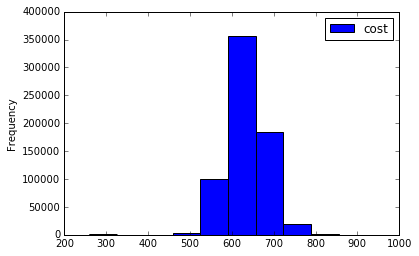

In [62]:
train_data[["cost"]].plot(kind = "hist")

In [91]:
print "\n Cost Set"

print train_data["cost"].unique()

print "\n Car Age Set"

print train_data["car_age"].unique()

print "\n"

cost_age_df =  train_data[["cost", "car_age"]].groupby("car_age").mean()

print cost_age_df.head()


 Cost Set
[633 630 638 634 755 730 731 618 616 607 605 602 629 620 627 626 604 585
 603 614 590 584 591 589 597 681 685 705 659 615 622 648 601 600 556 572
 578 575 676 598 689 609 696 692 703 657 654 665 594 610 606 550 551 583
 613 608 612 568 574 577 765 642 652 694 671 651 641 645 643 649 646 702
 563 566 693 701 596 656 559 562 670 625 599 617 623 655 635 621 713 723
 719 721 582 658 586 639 637 650 706 729 735 666 611 580 593 587 592 588
 624 662 704 691 767 699 667 542 631 734 728 725 644 836 653 525 545 549
 632 733 683 738 557 640 687 674 690 684 682 761 530 688 558 661 564 571
 660 686 680 535 536 531 538 647 569 567 573 668 628 754 737 663 708 636
 619 581 695 726 714 707 678 720 718 712 766 760 770 740 727 669 709 757
 672 677 747 743 745 742 673 758 769 768 717 722 555 700 579 716 710 697
 698 675 595 565 570 744 748 576 724 664 679 798 753 553 732 541 533 539
 544 505 506 547 711 554 528 548 560 518 524 546 715 779 756 736 529 784
 792 785 825 521 789 561 540 543 752 788

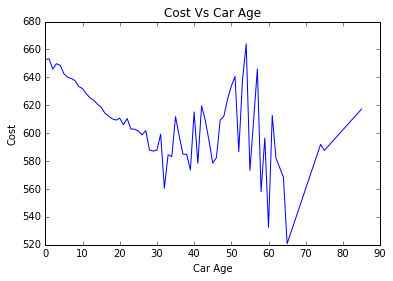

In [92]:
%matplotlib inline

pylab.plot(cost_age_df)

pylab.xlabel("Car Age")

pylab.ylabel("Cost")

pylab.title("Cost Vs Car Age")

In [93]:
print train_data.corr()["cost"]

customer_ID         -0.002250
shopping_pt          0.043419
record_type         -0.011826
day                  0.010793
location             0.002413
group_size          -0.024009
homeowner           -0.213846
car_age             -0.281002
risk_factor          0.103675
age_oldest          -0.210225
age_youngest        -0.238497
married_couple      -0.075193
C_previous          -0.082235
duration_previous   -0.161597
A                    0.325922
B                    0.118573
C                   -0.033931
D                    0.002963
E                    0.259183
F                    0.141707
G                   -0.011274
cost                 1.000000
Name: cost, dtype: float64


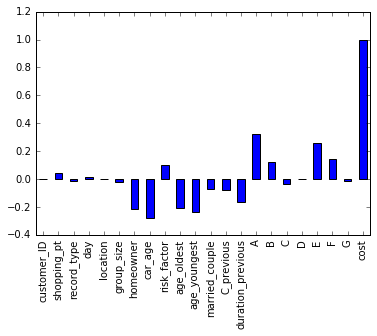

In [94]:
train_data.corr()["cost"].plot.bar()

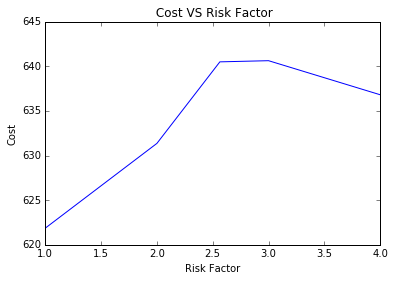

In [98]:
pylab.plot(train_data[["cost","risk_factor"]].groupby("risk_factor").mean())

pylab.xlabel("Risk Factor")

pylab.ylabel("Cost")

pylab.title(" Cost VS Risk Factor")

1) Cost goes down as car gets old

2) Cost goes up with higher risk factor

3) Option A and E increase with cost and risk factor , lets find out.

In [99]:
print train_data.corr()["A"]

customer_ID         -0.002306
shopping_pt          0.052803
record_type          0.012162
day                 -0.001005
location            -0.003494
group_size           0.017806
homeowner            0.048471
car_age             -0.436740
risk_factor         -0.046156
age_oldest           0.003914
age_youngest         0.005199
married_couple       0.023021
C_previous           0.120816
duration_previous    0.029891
A                    1.000000
B                    0.158040
C                    0.190519
D                    0.189351
E                    0.324618
F                    0.531186
G                    0.045335
cost                 0.325922
Name: A, dtype: float64


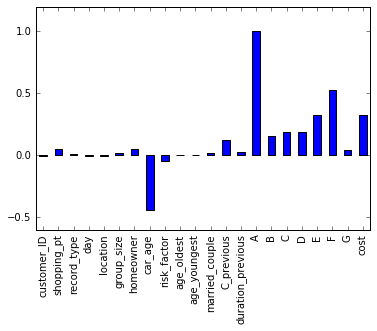

In [101]:
train_data.corr()["A"].plot.bar()

Coverage A has a strong negative correlation with car age , and small negative correlatoin with risk factor, its looks like from the data it has a positive relation with home owners and people who stay longer with thier previous instance

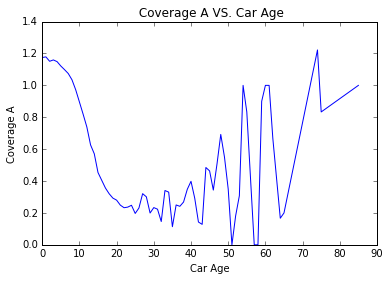

In [107]:
pylab.plot(train_data[["A","car_age"]].groupby("car_age").mean())

pylab.xlabel("Car Age")

pylab.ylabel("Coverage A")

pylab.title(" Coverage A VS. Car Age")

In [109]:
#train_data[["A","C_previous"]].groupby("C_previous").plot.bar()

In [ ]:
#print train_data[["A","C_previous"]].groupby("C_previous")

In [ ]:
print train_data["C_previous"].unique()